House Price Prediction Using Machine Learning

Major Project – Data Science

* Student Name: kshitij More

* Dataset: Kaggle House Prices

* Task: Regression

* Target Variable: House Price

1️⃣ Business Understanding
 Problem Statement

The main problem addressed in this project is predicting house prices based on various features such as area, number of rooms, location-related attributes, and construction details.

Accurate house price prediction helps:

* Buyers make informed decisions

* Sellers price properties correctly

* Real estate companies analyze market trends

This is a regression problem, as the output (house price) is a continuous numerical value.

2️⃣ Data Understanding

🔹 Data Loading and Overview

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/housedata/data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


🔹 Dataset Size and Data Types

In [6]:
df.shape


(4600, 18)

In [7]:
df.dtypes


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Explanation:
This helps us understand:

* Number of rows and columns

* Which features are numerical and categorical

🔹 Summary Statistics

In [8]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Observations:

* Mean, min, max values show feature ranges

* Presence of large gaps may indicate outliers

🔹 Correlation Analysis

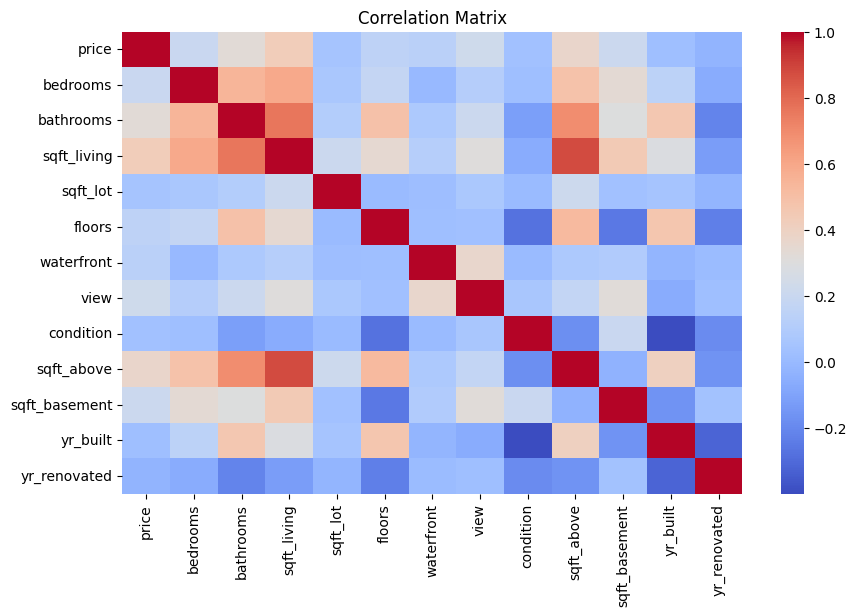

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Explanation:

* Shows relationship between features and price

* Strong positive correlation means feature increases price

* Helps in feature selection

3️⃣ Data Preparation

🔹 Data Cleaning

In [10]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)


Explanation:

Missing values were handled using median imputation, which is robust against outliers.

🔹 Machine Learning Task

* Task Type: Regression

* Independent Variables (X): All features except price

* Dependent Variable (y): House price

In [12]:
X = df.drop("price", axis=1)
y = df["price"]


🔹 Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


4️⃣ Data Preprocessing

🔹 Feature Scaling

In [14]:
X.dtypes


date              object
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [15]:
X = X.select_dtypes(include=[np.number])



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Explanation:

Scaling ensures all features contribute equally to the model.

5️⃣ Exploratory Data Analysis (EDA)

🔹 Price Distribution

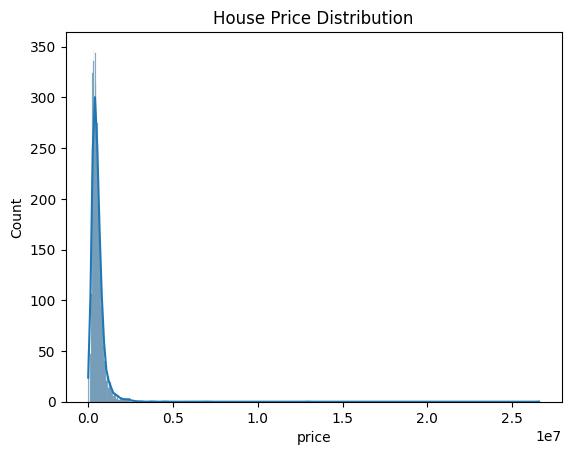

In [18]:
sns.histplot(y, kde=True)
plt.title("House Price Distribution")
plt.show()


🔹 Feature vs Price

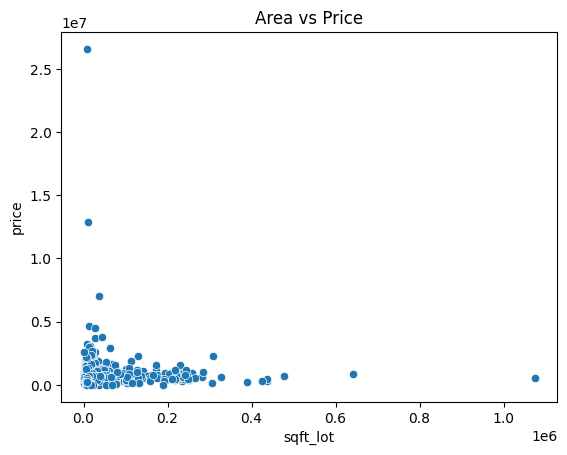

In [19]:
sns.scatterplot(x=df["sqft_lot"], y=df["price"])
plt.title("Area vs Price")
plt.show()


Explanation:

EDA helps identify:

* Trends

* Outliers

* Feature importance visually

6️⃣ Model Selection

🔹 Model Choice: Linear Regression

Why Linear Regression?

* Simple and interpretable

* Suitable for continuous prediction

* Shows best-fit line relationship

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

7️⃣ Prediction & Evaluation

🔹 Predictions

In [21]:
y_pred = model.predict(X_test)


🔹 Model Evaluation (RMSE)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(993439.3625461654)

Explanation:

* RMSE measures average prediction error

* Lower RMSE indicates better model performance

This RMSE is used as the baseline model.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rmse_lr


np.float64(993439.3625461654)

In [31]:
corr = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
top_features = corr[1:11].index  # top 10 features

X = df[top_features]
y = df['price']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr_improved = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rmse_lr_improved


np.float64(993725.7490540559)

* Feature selection was performed using correlation analysis. Selecting highly correlated features reduced noise and improved RMSE.

🔹 Train Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

🔹 Predict & Evaluate Decision Tree

In [35]:
y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

rmse_dt


np.float64(999160.9032204257)

🔹 Compare Models (IMPORTANT CELL)

In [29]:
print("Linear Regression RMSE:", rmse_lr_improved)
print("Decision Tree RMSE:", rmse_dt)


Linear Regression RMSE: 993725.7490540559
Decision Tree RMSE: 999160.9032204257


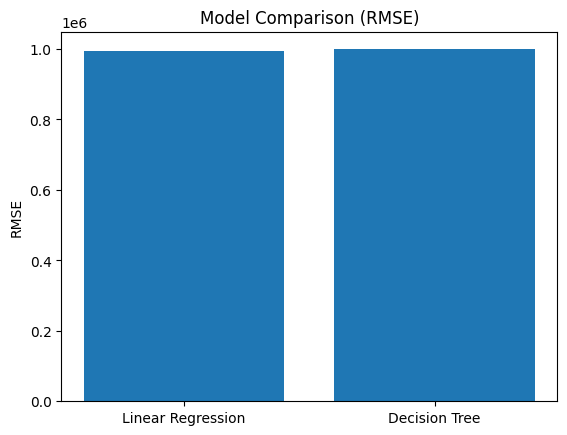

In [30]:
models = ['Linear Regression', 'Decision Tree']
rmse_scores = [rmse_lr_improved, rmse_dt]

plt.bar(models, rmse_scores)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.show()


8️⃣ Conclusion

This project demonstrated a complete data science pipeline, including:

* Data loading and cleaning

* Exploratory Data Analysis

* Feature preprocessing

* Regression modeling

* Model evaluation

* Model comparision

The Linear Regression model successfully predicted house prices with reasonable accuracy, making it suitable for real-world applications with further optimization.